In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df_sinhvien = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/01.sinhvien.xlsx')
df_sv_dtb_hocky = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_hocky.xlsx')
df_sv_dtb_toankhoa = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx')

In [4]:
df_sinhvien = df_sinhvien[['mssv',' namsinh',' gioitinh',' noisinh',' lopsh',' khoa',' hedt',' khoahoc',' chuyennganh2',' tinhtrang',' diachi_tinhtp']]

In [5]:
# Đổi các string có 'NULL', ' NULL', and 'NULL?' thành pd.NaN
df_sinhvien.replace(to_replace=r'.*NULL.*', value=pd.NA, regex=True, inplace=True)
df_sv_dtb_hocky.replace(to_replace=r'.*NULL.*', value=pd.NA, regex=True, inplace=True)
df_sv_dtb_toankhoa.replace(to_replace=r'.*NULL.*', value=pd.NA, regex=True, inplace=True)

# Accuracy dimension

## File SV_DTB_HOCKY

In [ ]:
df_sv_dtb_hocky.dtypes

,0
mssv,object
hocky,int64
namhoc,int64
dtbhk,float64
sotchk,int64


In [ ]:
df = df_sv_dtb_hocky
total_row = len(df);
# Xác định các lỗi:
year_errors = (df['namhoc'] < 2006) | df['namhoc'].isna()
avg_mark_errors = (df['dtbhk'] < 0) | (df['dtbhk'] > 10) | df['dtbhk'].isna()
credits_errors = (df['sotchk'] < 0) | (df['sotchk'] > 30) | df['sotchk'].isna() | ((df['hocky'] == 3) & (df['sotchk'] > 12))
semester_errors = (df['hocky'] > 3) | (df['hocky'] < 1) | df['hocky'].isna()

# Tính tổng số bản ghi có lỗi
total_errors = year_errors.sum() + avg_mark_errors.sum() + credits_errors.sum()

# Tổng số bản ghi trong DataFrame
total_records = df.shape[0] * df.shape[1]  # Tổng số giá trị (số hàng * số cột)

# Tỷ lệ lỗi
error_rate = total_errors / total_records * 100
year_error_rate = year_errors.sum() / total_row * 100
avg_mark_error_rate = avg_mark_errors.sum() / total_row * 100
credits_error_rate = credits_errors.sum() / total_row * 100
semester_errors_rate = semester_errors.sum() / total_row * 100


print(f'Tỷ lệ lỗi trong feature namhoc: {year_error_rate}' )
print(f'Tỷ lệ lỗi trong feature dtbhk: {avg_mark_error_rate}' )
print(f'Tỷ lệ lỗi trong feature sotchk: {credits_error_rate}' )
print(f'Tỷ lệ lỗi trong feature hocky: {semester_errors_rate}' )

print(f'Tổng số lỗi: {total_errors}')
print(f'Tỷ lệ lỗi: {error_rate:.2f}%')

Tỷ lệ lỗi trong feature namhoc: 0.0
Tỷ lệ lỗi trong feature dtbhk: 0.0
Tỷ lệ lỗi trong feature sotchk: 1.1794895941237404
Tổng số lỗi: 1002
Tỷ lệ lỗi: 0.24%


In [ ]:
df.describe()

,hocky,namhoc,dtbhk,sotchk
count,84952.00000,84952.000000,84952.000000,84952.000000
mean,1.52605,2018.440861,6.714582,16.703350
std,0.60096,2.466169,2.049809,6.305202
min,1.00000,2013.000000,0.000000,0.000000
25%,1.00000,2017.000000,6.070000,14.000000
50%,1.00000,2019.000000,7.250000,18.000000
75%,2.00000,2021.000000,8.070000,20.000000
max,3.00000,2022.000000,10.000000,195.000000


In [ ]:
df_numeric = df.drop(columns=['mssv'])

In [ ]:
correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

           hocky    namhoc     dtbhk    sotchk
hocky   1.000000 -0.196092 -0.104380 -0.283795
namhoc -0.196092  1.000000  0.155559 -0.080702
dtbhk  -0.104380  0.155559  1.000000  0.163745
sotchk -0.283795 -0.080702  0.163745  1.000000


## File SV_DTB_TOANKHOA

In [6]:
df_sv_dtb_toankhoa.dtypes

,0
mssv,object
dtb_toankhoa,float64
dtb_tichluy,float64
sotc_tichluy,float64


In [ ]:
df = df_sv_dtb_toankhoa
total_row = len(df);
# Xác định các lỗi:
avg_mark_total_errors = (df['dtb_toankhoa'] < 0) | (df['dtb_toankhoa'] > 10) | df['dtb_toankhoa'].isna()
avg_mark_cumulative_errors = (df['dtb_tichluy'] < 0) | (df['dtb_tichluy'] > 10) | df['dtb_tichluy'].isna()
credits_errors = (df['sotc_tichluy'] < 0) | df['sotc_tichluy'].isna()

# Tính tổng số bản ghi có lỗi
total_errors = avg_mark_total_errors.sum() + avg_mark_cumulative_errors.sum() + credits_errors.sum()

# Tổng số bản ghi trong DataFrame
total_records = df.shape[0] * df.shape[1]  # Tổng số giá trị (số hàng * số cột)

# Tỷ lệ lỗi
error_rate = total_errors / total_records * 100
avg_mark_total_errors_rate = avg_mark_total_errors.sum() / total_row * 100
cumulative_errors_rate = avg_mark_cumulative_errors.sum() / total_row * 100
credits_error_rate = credits_errors.sum() / total_row * 100


print(f'Tỷ lệ lỗi trong feature dtb_toankhoa: {avg_mark_total_errors}' )
print(f'Tỷ lệ lỗi trong feature dtb_tichluy: {avg_mark_cumulative_errors}' )
print(f'Tỷ lệ lỗi trong feature sotc_tichluy: {credits_error_rate}' )

print(f'Tổng số lỗi: {total_errors}')
print(f'Tỷ lệ lỗi: {error_rate:.2f}%')

In [ ]:
df_numeric = df.drop(columns=['mssv'])
correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

## File Sinhvien

In [7]:
df_sinhvien.dtypes

,0
mssv,object
namsinh,float64
gioitinh,float64
noisinh,object
lopsh,object
khoa,object
hedt,object
khoahoc,float64
chuyennganh2,object
tinhtrang,float64


# Completeness dimension

In [ ]:
# Hàm tính tỉ lệ non-null trong từng cột
def calculate_non_null_ratios(df):
    non_null_ratios = {}
    total_rows = len(df)

    #duyệt qua từng cột và tính tỉ lệ non-null ở từng cột, hàm này trả về 2 giá trị là tỉ lệ nonnull ở từng cột và trên một table
    for column in df.columns:
        non_null_count = df[column].notnull().sum()
        non_null_ratio = non_null_count / total_rows
        non_null_ratios[column] = non_null_ratio

    average_non_null_ratio = sum(non_null_ratios.values()) / len(non_null_ratios)
    return non_null_ratios, average_non_null_ratio

In [ ]:
#Thực nghiệm với bảng sinh viên
nonnullsv,average_nonnullsv = calculate_non_null_ratios(df_sinhvien)
# In ra tỉ lệ nonnull ở từng cột
for column, ratio in nonnullsv.items():
    print(f"Tỉ lệ nonnull ở cột '{column}': {ratio:.2f}")

# Trung bình tỉ lệ nonnull
print(f"\nTrung bình tỉ lệ nonnull trên toàn bảng: {average_nonnullsv:.2f}")

Tỉ lệ nonnull ở cột 'mssv': 1.00
Tỉ lệ nonnull ở cột ' namsinh': 1.00
Tỉ lệ nonnull ở cột ' gioitinh': 1.00
Tỉ lệ nonnull ở cột ' noisinh': 0.99
Tỉ lệ nonnull ở cột ' lopsh': 1.00
Tỉ lệ nonnull ở cột ' khoa': 1.00
Tỉ lệ nonnull ở cột ' hedt': 1.00
Tỉ lệ nonnull ở cột ' khoahoc': 1.00
Tỉ lệ nonnull ở cột ' chuyennganh2': 1.00
Tỉ lệ nonnull ở cột ' tinhtrang': 1.00
Tỉ lệ nonnull ở cột ' diachi_tinhtp': 0.99

Trung bình tỉ lệ nonnull trên toàn bảng: 1.00


In [ ]:
#Thực nghiệm với bảng sv_dtb_hocky
nonnullsvhk,average_nonnullsvhk = calculate_non_null_ratios(df_sv_dtb_hocky)
# In ra tỉ lệ nonnull ở từng cột
for column, ratio in nonnullsvhk.items():
    print(f"Tỉ lệ nonnull ở cột '{column}': {ratio:.2f}")

# Trung bình tỉ lệ nonnull
print(f"\nTrung bình tỉ lệ nonnull trên toàn bảng: {average_nonnullsvhk:.2f}")

Tỉ lệ nonnull ở cột 'mssv': 1.00
Tỉ lệ nonnull ở cột 'hocky': 1.00
Tỉ lệ nonnull ở cột 'namhoc': 1.00
Tỉ lệ nonnull ở cột 'dtbhk': 1.00
Tỉ lệ nonnull ở cột 'sotchk': 1.00

Trung bình tỉ lệ nonnull trên toàn bảng: 1.00


In [ ]:
#Thực nghiệm với bảng sv_dtb_toankhoa
nonnullsvtk,average_nonnullsvtk = calculate_non_null_ratios(df_sv_dtb_toankhoa)
# In ra tỉ lệ nonnull ở từng cột
for column, ratio in nonnullsvtk.items():
    print(f"Tỉ lệ nonnull ở cột '{column}': {ratio:.2f}")

# Trung bình tỉ lệ nonnull
print(f"\nTrung bình tỉ lệ nonnull trên toàn bảng: {average_nonnullsvtk:.2f}")

Tỉ lệ nonnull ở cột 'mssv': 1.00
Tỉ lệ nonnull ở cột 'dtb_toankhoa': 0.98
Tỉ lệ nonnull ở cột 'dtb_tichluy': 0.98
Tỉ lệ nonnull ở cột 'sotc_tichluy': 0.98

Trung bình tỉ lệ nonnull trên toàn bảng: 0.98


# Consitency dimension

In [ ]:
# IMPORT LIB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df_sinhvien = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/01.sinhvien.xlsx')
df_sinhvien_dtb_hocky  = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_hocky.xlsx')
df_sinhvien_dtb_toankhoa = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx')

Kiểm tra tính nhất quán trong dữ liệu
1. Phân tích thống kê: Kiểm tra thống kê chi-squared, t-test, độ tương quan
2. So sánh nguồn dữ liệu đáng tin cậy: Sử dụng phương pháp "ground truth" để xác định giá trị chính xác của dữ liệu.?
3. Xác minh dữ liệu: Thực hiện kiểm tra thủ công hoặc tự động để xác định các giá trị không nhất quán trong dữ liệu.
4. Phân tích độ nhạy?

**DATA QUALITY FOR 01.SINHVIEN.XLSX**

In [ ]:
# get 12 colums first in df
df_sinhvien = df_sinhvien.iloc[:, 0:12]
df_sinhvien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8295 non-null   float64
 1   mssv            8294 non-null   object 
 2    namsinh        8294 non-null   float64
 3    gioitinh       8295 non-null   float64
 4    noisinh        8295 non-null   object 
 5    lopsh          8295 non-null   object 
 6    khoa           8295 non-null   object 
 7    hedt           8295 non-null   object 
 8    khoahoc        8295 non-null   float64
 9    chuyennganh2   8295 non-null   object 
 10   tinhtrang      8295 non-null   float64
 11   diachi_tinhtp  8295 non-null   object 
dtypes: float64(5), object(7)
memory usage: 779.8+ KB


In [ ]:
# Lớp để giải quyết một số tiền tính toán chung cho các bảng csv
class handle_fileExcel:
    def check_values(self, df):
        for col in df.columns:
            print(f'Column: {col} {df[col].dtype}')
            print(f'Quantity of null values: {df[col].isnull().sum()}')

            # check null, nan
            if(df[col].dtype == 'object'):
                # convert to lower case
                df[col] = df[col].str.lower()

                # count nan and null string in column
                numNan = df[col].apply(lambda x: x == 'nan').sum()
                numNull = df[col].apply(lambda x: x == 'null').sum()

                print(f'Quantity of err values: {numNan + numNull}')
                print('-----------------------------------')
                print(df[col].value_counts())
            print("\n")

    def delete_space(self, df):
        # delete space in name column
        df.rename(columns=lambda x: x.strip(), inplace=True)

        # delete space in string of each cell
        for col in df.columns:
            if(df[col].dtype == 'object'):
                df[col] = df[col].str.strip()

In [ ]:
# Tạo đối tượng cho class
handle = handle_fileExcel()

In [ ]:
# 1 Phân tích thống kê mô tả cho df_sinhvien

# 1.1 Duyệt qua các cột trong df_sinhvien để kiểm tra nan, null, unique values
handle.delete_space(df_sinhvien)
handle.check_values(df_sinhvien)

Column: id float64
Quantity of null values: 21


Column: mssv object
Quantity of null values: 22
Quantity of err values: 0
-----------------------------------
mssv
be375baaxpvaibaexe9jdlha4z2ghj3/pvstcxr2    1
5d749c31xpvaibaexe+nyyotv4fwdsswpy7zzbtf    1
f2eb7aefxpvaibaexe+43hjfrferjhs1cjl0nvi6    1
eb097949xpvaibaexe+43hjfrferjl2qy4gdibkq    1
172c622dxpvaibaexe+43hjfrferjjs337wg3omj    1
                                           ..
e63fe147xpvaibaexe+ld9vp5i9+1rq+vnnuff9r    1
fe6b6bd2xpvaibaexe+ld9vp5i9+1qcjzhpthmki    1
61368a41xpvaibaexe+ld9vp5i9+1gj3pxdezkcc    1
d2bf715cxpvaibaexe+ld9vp5i9+1hg6eur9nxd5    1
7cd9b404xpvaibaexe8m4lts8xjc9c/g97nvpp52    1
Name: count, Length: 8294, dtype: int64


Column: namsinh float64
Quantity of null values: 22


Column: gioitinh float64
Quantity of null values: 21


Column: noisinh object
Quantity of null values: 21
Quantity of err values: 21
-----------------------------------
noisinh
'thành phố hồ chí minh'        1287
'đồng nai'           

In [ ]:
# 1.2 Kiểm tra độ nhất quán của khoa và lopsh xem thử có lopsh nào thuộc nhầm khoa hay không
list_khoa = enumerate(df_sinhvien['khoa'])

# Duyệt qua từng giá trị trong cột lopsh
list_lopsh = df_sinhvien['lopsh']

#  Tạo 1 dicrionary chứa các giá trị lopsh và khoa tương ứng
dict = {}

# Duyệt qua từng giá trị trong cột lopsh
for index, khoa in list_khoa:
    # Kiểm tra xem lopsh khác null
    if pd.notnull(khoa):
        # Lấy thông tin 4 dòng đâu là kí hiệu cho lớp sinh hoạt
        lopsh = list_lopsh[index][0:4]

        # kiểm tra xem có khoa nào trong dict chưa, nêu chưa thì push vào
        if khoa not in dict:
            dict[khoa] = [lopsh]
        else:
            # Kiểm tra xem lopsh đã tồn tại trong khoa chưa, nếu chưa thì push vào
            if lopsh not in dict[khoa]:
                dict[khoa].append(lopsh)
# Duyệt lần lượt từng khoa và lopsh tương ứng
for khoa in dict:
    print(f'Khoa: {khoa}')
    print(f'lopsh: {dict[khoa]}')

Khoa: cnpm
lopsh: ['ktpm', 'pmcl']
Khoa: httt
lopsh: ['httt', 'cttt', 'tmđt', 'htcl', 'tmcl']
Khoa: khmt
lopsh: ['khmt', 'khtn', 'khcl']
Khoa: mmt&tt
lopsh: ['mmtt', 'antt', 'antn', 'mtlk', 'attt', 'attn', 'cntt', 'atcl', 'mmcl']
Khoa: ktmt
lopsh: ['mtcl', 'ktmt']
Khoa: kttt
lopsh: ['cntt', 'khdl', 'cncl']


In [ ]:
# Kiểm tra MSSV không trùng khớp
missing_mssv = df_sinhvien[~df_sinhvien['mssv'].isin(df_sinhvien_dtb_hocky['mssv'])]
print("MSSV không tồn tại trong bảng điểm:", missing_mssv['mssv'].unique())

MSSV không tồn tại trong bảng điểm: ['be375baaxpvaibaexe9jdlha4z2ghj3/pvstcxr2'
 '2420ed57xpvaibaexe/lh6v1xxtkja6jlfrupklm'
 '83b76c01xpvaibaexe/loccskaoio2k46r7t4qnt' ...
 '75ad7b4axpvaibaexe8xmctz03/bewogrwst0zxm'
 'cb263c18xpvaibaexe8xmctz03/be8yk40qwdpir'
 '7cd9b404xpvaibaexe8m4lts8xjc9c/g97nvpp52']


Đây là một sự không nhất quán vì dữ liệu học tập sinh viên trong bảng thông tin sinh viên lại không có trong bảng kết quả điểm trung bình học kì của sinh viên.

In [ ]:
# 1.3 Merge 2 bảng sinh viên và điểm trung bình học kỳ

# Xóa các giá trị null ở mssv trước khi tiến hành gộp
df_sinhvien.dropna(subset=['mssv'], inplace=True)
df_sinhvien_dtb_hocky.reset_index(drop=True, inplace=True)
df_sinhvien.dropna(subset=['mssv'], inplace=True)
df_sinhvien.reset_index(drop=True, inplace=True)
df_sinhvien['mssv'] = df_sinhvien['mssv'].astype(str)
df_sinhvien_dtb_hocky['mssv'] = df_sinhvien_dtb_hocky['mssv'].astype(str)

# Gộp 2 bảng sinh viên và điểm trung bình học kỳ
df_megrge_sinhvien_sv_dtb_hocky = pd.merge(df_sinhvien_dtb_hocky, df_sinhvien, on='mssv', how='inner', sort=True)
df_megrge_sinhvien_sv_dtb_hocky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssv           0 non-null      object 
 1   hocky          0 non-null      int64  
 2   namhoc         0 non-null      int64  
 3   dtbhk          0 non-null      float64
 4   sotchk         0 non-null      int64  
 5   id             0 non-null      float64
 6   namsinh        0 non-null      float64
 7   gioitinh       0 non-null      float64
 8   noisinh        0 non-null      object 
 9   lopsh          0 non-null      object 
 10  khoa           0 non-null      object 
 11  hedt           0 non-null      object 
 12  khoahoc        0 non-null      float64
 13  chuyennganh2   0 non-null      object 
 14  tinhtrang      0 non-null      float64
 15  diachi_tinhtp  0 non-null      object 
dtypes: float64(6), int64(3), object(7)
memory usage: 124.0+ bytes


In [ ]:
for index, row in df_megrge_sinhvien_sv_dtb_hocky.iterrows():
    # Lấy thông tin khoahoc
    khoahoc = row['khoahoc']

    # Lấy thông tin năm điểm thi trung bình học kì
    nam = row['namhoc']

    # Check xem năm học có khớp với khóa học không
    if khoahoc + 2005 > nam:
        print(f'Không nhất quán')

kiểm tra xem sinh viên có thông tin học kì nào mà trước khi sinh viên nhập học không, tuy nhiên không có.

**DATA QUALITY FOR SINHVIEN_DTB_TOANKHOA**

In [ ]:
# 2 Thống kê mô tả cho df_sinhvien_dtb_toankhoa

# 2.1 duyệt qua các cột trong df_sinhvien_dtb_toankhoa để kiểm tra nan, null, unique values
handle.delete_space(df_sinhvien_dtb_toankhoa)
handle.check_values(df_sinhvien_dtb_toankhoa)

Column: mssv object
Quantity of null values: 0
Quantity of err values: 0
-----------------------------------
mssv
c410fec4xpvaibaexe/odi52as1tq/z6uateiytx    1
9eaf0738xpvaibaexe9fwzbwscouqejnkdcrgox1    1
b2816b7bxpvaibaexe/ykn5ysyyl7ms3vlfpnru+    1
f06a3c0fxpvaibaexe+nmgqbvgcjj7zdqvwrioyl    1
961ab4faxpvaibaexe//3t8+us0x0j9laqytb3ze    1
                                           ..
fda9dea1xpvaibaexe+tqjlvjoj4bbq7gu36vta9    1
d42ea478xpvaibaexe+tqjlvjoj4bu9+razl3jcg    1
204d6ab9xpvaibaexe9v1gttdrnqfwjtg99tdlxu    1
0a275ef0xpvaibaexe9j81k8mh0oj07f7m1swtm7    1
f3da4b4expvaibaexe/jswsddhmzjuhpmdc53m8g    1
Name: count, Length: 13970, dtype: int64


Column: dtb_toankhoa float64
Quantity of null values: 322


Column: dtb_tichluy float64
Quantity of null values: 322


Column: sotc_tichluy float64
Quantity of null values: 322




In [ ]:
# 2.2 Kiếm tra min max của cột điểm trung bình toàn khóa, điểm trung bình toàn khóa tích lũy, số tín chỉ tích lũy
print(f'Min , Max giá trị của cột dtb_toankhoa:: {df_sinhvien_dtb_toankhoa["dtb_toankhoa"].min()}, {df_sinhvien_dtb_toankhoa["dtb_toankhoa"].max()}')
print(f'Min , Max giá trị của cột dtb_tl:: {df_sinhvien_dtb_toankhoa["dtb_tichluy"].min()}, {df_sinhvien_dtb_toankhoa["dtb_tichluy"].max()}')
print(f'Min , Max giá trị của cột stc_tichluy:: {df_sinhvien_dtb_toankhoa["sotc_tichluy"].min()}, {df_sinhvien_dtb_toankhoa["sotc_tichluy"].max()}')

Min , Max giá trị của cột dtb_toankhoa:: 0.0, 9.66
Min , Max giá trị của cột dtb_tl:: 0.0, 9.66
Min , Max giá trị của cột stc_tichluy:: 0.0, 193.0


Nhìn chung không có gì bất thường ở điểm ở các cột vì giá trị nằm trong khoảng 0-10. tuy nhiên tín chỉ của một sinh viên lại 193 ( hơi bất thường ) vì số tín chỉ khá cao so với còn lại

In [ ]:
# 2.2 Kiểm định giải thiết t-test cho 2 cột dtb_toankhoa và dtb_tichluy
stats.ttest_ind(
    df_sinhvien_dtb_toankhoa['dtb_toankhoa'],
    df_sinhvien_dtb_toankhoa['dtb_tichluy'],
    nan_policy='omit',
    alternative='two-sided',
    equal_var=True,
)


TtestResult(statistic=-20.71581519077633, pvalue=1.3346598969786298e-94, df=27294.0)

Vì giá trị pvalue > 0.05 cho nên ko thể bác bỏ giả thuyết H0: Không có sự khác biệt giữa 2 cột điểm trung bình toàn khoa và tích lũy. Tuy nhiên để chắc chắn hơn vì sẽ dùng method mean trong thư viên pandas để kiểm tra

In [ ]:
# Kiểm tra mean của 2 cột thống kê bằng tính giá trị trung bình
print(f'Mean of dtb_toankhoa: {df_sinhvien_dtb_toankhoa["dtb_toankhoa"].mean()}')
print(f'Mean of dtb_tichluy: {df_sinhvien_dtb_toankhoa["dtb_tichluy"].mean()}')

Mean of dtb_toankhoa: 6.916518171160609
Mean of dtb_tichluy: 7.313278135990621


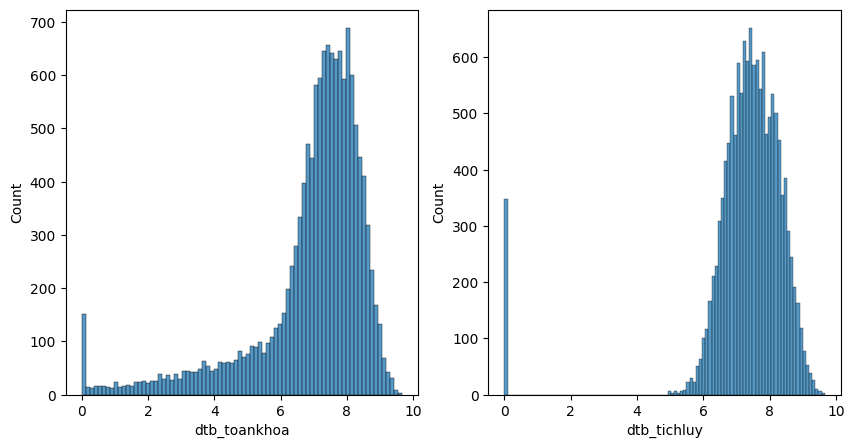

In [ ]:
# Vẽ histogram cho 2 cột dtb_toankhoa và dtb_tichluy
fig, axis = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
sns.histplot(df_sinhvien_dtb_toankhoa['dtb_toankhoa'], ax=axis[0])
sns.histplot(df_sinhvien_dtb_toankhoa['dtb_tichluy'], ax=axis[1])
plt.show()

In [ ]:
# 2.3 Kiểm định hệ số tương quan cho các cột điểm số và tín chỉ
df_sinhvien_dtb_toankhoa.corr(numeric_only=True)

,dtb_toankhoa,dtb_tichluy,sotc_tichluy
dtb_toankhoa,1.000000,0.831056,0.472040
dtb_tichluy,0.831056,1.000000,0.322388
sotc_tichluy,0.472040,0.322388,1.000000


**DATA QUALITY FOR SINHVIEN_DTB_HOCKY**

In [ ]:
# 3. Thống kê mô tả cho df_sinhvien_dtb_hocky

# 3.1 duyệt qua các cột trong df_sinhvien_dtb_hocky để kiểm tra nan, null, unique values
handle.delete_space(df_sinhvien_dtb_hocky)
handle.check_values(df_sinhvien_dtb_hocky)

Column: mssv object
Quantity of null values: 0
Quantity of err values: 0
-----------------------------------
mssv
9a84bbe7xpvaibaexe8ydgsbcmjqa6hvcbpa5sda    22
5ea0e379xpvaibaexe9xnw4t0gpgx3zlzmzrjta6    22
0a275ef0xpvaibaexe9j81k8mh0oj07f7m1swtm7    21
54166400xpvaibaexe+5f3nhbx2ehx/ey+0e6tvl    21
0baf3540xpvaibaexe9hxpb1pepyfqehhipofklx    21
                                            ..
d465ec68xpvaibaexe+8+5uqapsgdtdop8cqlmb3     1
2ca61c50xpvaibaexe+8+5uqapsgdx1ynlqcm/n4     1
774f6000xpvaibaexe+8+5uqapsgdc5hte2tmaaa     1
74e2febfxpvaibaexe+8+5uqapsgdd+wl3mn4wg0     1
23418dfbxpvaibaexe8fkfoa0rob11zorpcgazsn     1
Name: count, Length: 13608, dtype: int64


Column: hocky int64
Quantity of null values: 0


Column: namhoc int64
Quantity of null values: 0


Column: dtbhk float64
Quantity of null values: 0


Column: sotchk int64
Quantity of null values: 0




In [ ]:
# 3.2 kiểm tra cột điểm trung bình học kỳ + số tín chỉ học kỳ min, max
print(f'Gía trị min, max của điểm trung bình học kỳ là : {df_sinhvien_dtb_hocky["dtbhk"].min(), df_sinhvien_dtb_hocky["dtbhk"].max()}')
print(f'Gía trị min, max của số tín chỉ học kỳ là : {df_sinhvien_dtb_hocky["sotchk"].min(), df_sinhvien_dtb_hocky["sotchk"].max()}')

Gía trị min, max của điểm trung bình học kỳ là : (0.0, 10.0)
Gía trị min, max của số tín chỉ học kỳ là : (0, 195)


Đã xuất hiện sự không nhất quán ở đây vì số tín chỉ 1 kì không thể nào vượt quá 30 tín chỉ mà sau khi dùng hàm min max thì đã phát hiện ra 1 kì số tín chỉ của sinh viên là 195

In [ ]:
# 3.3 Kiểm định giả thiết
# 3.3.1 t-test cho 1 cột năm học
mean_namhoc = df_sinhvien_dtb_hocky['namhoc'].mean()
print(f'Mean of namhoc: {mean_namhoc}')

stats.ttest_1samp(df_sinhvien_dtb_hocky['namhoc'], mean_namhoc, nan_policy='omit', alternative='two-sided')

Mean of namhoc: 2018.4408607213486


TtestResult(statistic=0.0, pvalue=1.0, df=84951)

In [ ]:
# 3.3.2 Kiểm định giả thiết điểm trung bình học kì giữa 3 kì bằng anova

# Grouppby theo học kì
grouped = df_sinhvien_dtb_hocky.groupby('hocky') # hocky 1, 2, 3

# Kiểm định giả thiết Anova cho 3 học kì dựa vào grouped
stats.f_oneway(
    grouped.get_group(1)['dtbhk'],
    grouped.get_group(2)['dtbhk'],
    grouped.get_group(3)['dtbhk'],
    nan_policy='omit'
)

F_onewayResult(statistic=517.6969656208876, pvalue=3.3590053539560836e-224)

Theo như giả thuyết kiểm định Anova dùng để so sánh sự khác biệt giữa giá trị trung bình của 3 nhóm xem có sự khác nhau hay không. Dựa vào pvalue ta thấy rất bé và < 0.05 cho nên có thể bác bỏ giả thuyết H0( 3 nhóm điểm giữa 3 học kì 1, 2, 3) không khác nhau.

In [ ]:
# 3.3 Hệ số tương quan giữa cột dtbhk và tín chỉ
df_sinhvien_dtb_hocky_dtbhk_tinchi = df_sinhvien_dtb_hocky[['dtbhk', 'sotchk']]

df_sinhvien_dtb_hocky_dtbhk_tinchi.corr(numeric_only=True)

,dtbhk,sotchk
dtbhk,1.000000,0.163745
sotchk,0.163745,1.000000


# Uniqueness dimension

## 1. DataFrame df_sinhvien

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Tạo bản sao của DataFrame để tránh thay đổi gốc
df_sv_dtb_toankhoa_copy = df_sv_dtb_toankhoa[['mssv', 'dtb_toankhoa']].copy()

In [ ]:
# Tổng số bản ghi
total_records = len(df_sv_dtb_toankhoa_copy)

# Số lượng bản ghi trùng lặp
duplicate_records = df_sv_dtb_toankhoa_copy.duplicated().sum()

# Số lượng giá trị duy nhất trong mỗi cột
unique_values = df_sv_dtb_toankhoa_copy.nunique()

print(f"Tổng số bản ghi: {total_records}")
print(f"Số lượng bản ghi trùng lặp: {duplicate_records}")
print("Số lượng giá trị duy nhất trong mỗi thuộc tính:")
print(unique_values)

Tổng số bản ghi: 13970
Số lượng bản ghi trùng lặp: 0
Số lượng giá trị duy nhất trong mỗi thuộc tính:
mssv            13970
dtb_toankhoa      890
dtype: int64


In [ ]:
from scipy.stats import entropy

def calculate_entropy(column):
    counts = column.value_counts()
    return entropy(counts, base=2)

entropy_results = df_sv_dtb_toankhoa_copy.apply(calculate_entropy)

print("Entropy của các thuộc tính:")
print(entropy_results)

Entropy của các thuộc tính:
mssv            13.770044
dtb_toankhoa     8.907970
dtype: float64


Thống kê mô tả:
       dtb_toankhoa
count  13648.000000
mean       6.916518
std        1.748020
min        0.000000
25%        6.550000
50%        7.370000
75%        8.010000
max        9.660000


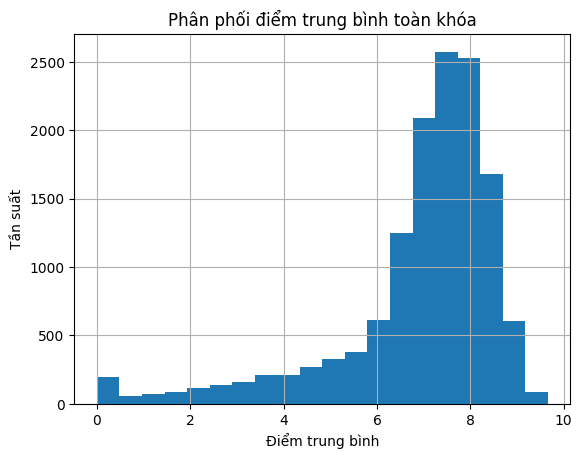

In [ ]:
# Thống kê mô tả
statistics = df_sv_dtb_toankhoa_copy.describe()

print("Thống kê mô tả:")
print(statistics)

# Vẽ histogram cho thuộc tính 'dtb_toankhoa'
import matplotlib.pyplot as plt

df_sv_dtb_toankhoa_copy['dtb_toankhoa'].hist(bins=20)
plt.title("Phân phối điểm trung bình toàn khóa")
plt.xlabel("Điểm trung bình")
plt.ylabel("Tần suất")
plt.show()


## 2 DataFrame df_sv_dtb_hocky

### 2.1. Kiểm Tra Thống Kê

In [ ]:
df_sv_dtb_hocky_copy = df_sv_dtb_hocky[['mssv', 'dtbhk', 'hocky', 'namhoc', 'sotchk']].copy()

In [ ]:
# Tổng số bản ghi
total_records = len(df_sv_dtb_hocky_copy)

# Số lượng bản ghi trùng lặp
duplicate_records = df_sv_dtb_hocky_copy.duplicated().sum()

# Số lượng giá trị duy nhất trong mỗi cột
unique_values = df_sv_dtb_hocky_copy.nunique()

print(f"Tổng số bản ghi: {total_records}")
print(f"Số lượng bản ghi trùng lặp: {duplicate_records}")
print("Số lượng giá trị duy nhất trong mỗi thuộc tính:")
print(unique_values)

Tổng số bản ghi: 84952
Số lượng bản ghi trùng lặp: 0
Số lượng giá trị duy nhất trong mỗi thuộc tính:
mssv      13608
dtbhk       991
hocky         3
namhoc       10
sotchk       37
dtype: int64


In [ ]:
from scipy.stats import entropy

def calculate_entropy(column):
    counts = column.value_counts()
    return entropy(counts, base=2)

entropy_results = df_sv_dtb_hocky_copy.apply(calculate_entropy)

print("Entropy của các thuộc tính:")
print(entropy_results)

Entropy của các thuộc tính:
mssv      13.474534
dtbhk      9.094085
hocky      1.244849
namhoc     3.192165
sotchk     4.265162
dtype: float64


Thống kê mô tả:
              dtbhk        hocky        namhoc        sotchk
count  84952.000000  84952.00000  84952.000000  84952.000000
mean       6.714582      1.52605   2018.440861     16.703350
std        2.049809      0.60096      2.466169      6.305202
min        0.000000      1.00000   2013.000000      0.000000
25%        6.070000      1.00000   2017.000000     14.000000
50%        7.250000      1.00000   2019.000000     18.000000
75%        8.070000      2.00000   2021.000000     20.000000
max       10.000000      3.00000   2022.000000    195.000000


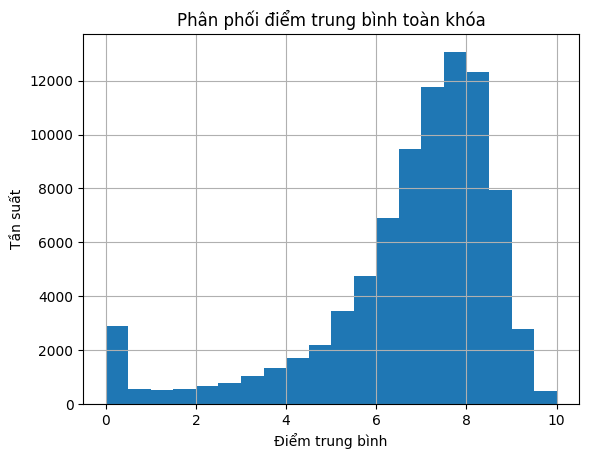

In [ ]:
# Thống kê mô tả
statistics = df_sv_dtb_hocky_copy.describe()

print("Thống kê mô tả:")
print(statistics)

# Vẽ histogram cho thuộc tính 'dtb_toankhoa'
import matplotlib.pyplot as plt

df_sv_dtb_hocky_copy['dtbhk'].hist(bins=20)
plt.title("Phân phối điểm trung bình toàn khóa")
plt.xlabel("Điểm trung bình")
plt.ylabel("Tần suất")
plt.show()

## 3. DataFrame df_sv_dtb_toankhoa

In [ ]:
df_sv_dtb_toankhoa = df_sv_dtb_toankhoa[['mssv', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']].copy()

In [ ]:
# Tổng số bản ghi
total_records = len(df_sv_dtb_toankhoa)

# Số lượng bản ghi trùng lặp
duplicate_records = df_sv_dtb_toankhoa.duplicated().sum()

# Số lượng giá trị duy nhất trong mỗi cột
unique_values = df_sv_dtb_toankhoa.nunique()

print(f"Tổng số bản ghi: {total_records}")
print(f"Số lượng bản ghi trùng lặp: {duplicate_records}")
print("Số lượng giá trị duy nhất trong mỗi thuộc tính:")
print(unique_values)

Tổng số bản ghi: 13970
Số lượng bản ghi trùng lặp: 0
Số lượng giá trị duy nhất trong mỗi thuộc tính:
mssv            13970
dtb_toankhoa      890
dtb_tichluy       418
sotc_tichluy      175
dtype: int64


In [ ]:
from scipy.stats import entropy

def calculate_entropy(column):
    counts = column.value_counts()
    return entropy(counts, base=2)

entropy_results = df_sv_dtb_toankhoa.apply(calculate_entropy)

print("Entropy của các thuộc tính:")
print(entropy_results)

Entropy của các thuộc tính:
mssv            13.770044
dtb_toankhoa     8.907970
dtb_tichluy      8.200734
sotc_tichluy     6.874470
dtype: float64


Thống kê mô tả:
       dtb_toankhoa   dtb_tichluy  sotc_tichluy
count  13648.000000  13648.000000  13648.000000
mean       6.916518      7.313278     94.115988
std        1.748020      1.396699     50.574767
min        0.000000      0.000000      0.000000
25%        6.550000      6.910000     50.000000
50%        7.370000      7.470000    104.000000
75%        8.010000      8.050000    141.000000
max        9.660000      9.660000    193.000000


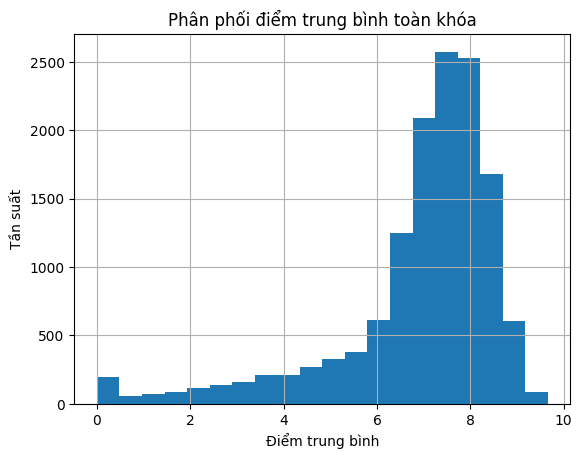

In [ ]:
# Thống kê mô tả
statistics = df_sv_dtb_toankhoa.describe()

print("Thống kê mô tả:")
print(statistics)

# Vẽ histogram cho thuộc tính 'dtb_toankhoa'
import matplotlib.pyplot as plt

df_sv_dtb_toankhoa['dtb_toankhoa'].hist(bins=20)
plt.title("Phân phối điểm trung bình toàn khóa")
plt.xlabel("Điểm trung bình")
plt.ylabel("Tần suất")
plt.show()

# Timelineness dimension(chỗ này chưa chia vì chưa hình dung được)

### 3.2. Phân tích độ tương quan

3.2.1. Độ Tương Quan Pearson và Spearman

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Chọn các cột số để phân tích
numeric_cols_tk = ['dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']

# Tính tương quan Pearson giữa 'dtb_toankhoa' và 'dtb_tichluy'
pearson_corr, pearson_p = pearsonr(df_sv_dtb_toankhoa['dtb_toankhoa'].dropna(), df_sv_dtb_toankhoa['dtb_tichluy'].dropna())
print(f"Pearson Correlation giữa 'dtb_toankhoa' và 'dtb_tichluy': {pearson_corr:.4f}, P-value: {pearson_p:.4f}")

# Tính tương quan Spearman giữa 'dtb_toankhoa' và 'dtb_tichluy'
spearman_corr, spearman_p = spearmanr(df_sv_dtb_toankhoa['dtb_toankhoa'].dropna(), df_sv_dtb_toankhoa['dtb_tichluy'].dropna())
print(f"Spearman Correlation giữa 'dtb_toankhoa' và 'dtb_tichluy': {spearman_corr:.4f}, P-value: {spearman_p:.4f}")


3.2.2. Ma Trận Tương Quan Cho Các Biến Số Số

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan Pearson
correlation_matrix_tk = df_sv_dtb_toankhoa[['dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']].corr(method='pearson')
print("Ma Trận Tương Quan Pearson:")
print(correlation_matrix_tk)

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_tk, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma Trận Tương Quan Pearson trong df_sv_dtb_toankhoa')
plt.show()


# Run model to get result from unhandling data and handled data

In [ ]:
Phần này phải thêm một ít xử lí dataset